In [1]:
import numpy as np
import pandas as pd

In [2]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [3]:
data = pd.read_csv('water.txt', sep = '\t', header=0)

In [4]:
data.head(5)

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [18]:
from math import sqrt
hard_mean = data.hardness.mean()
hard_std = data.hardness.std(ddof=1)
#ci_1 = _zconfint_generic(hard_mean, sqrt(hard_std/len(data.hardness)), 0.05, 'two-sided')
ci_1 = _tconfint_generic(hard_mean, hard_std/sqrt(len(data.hardness)), len(data.hardness) -1, 0.05, 'two-sided')
print ci_1

(37.424010072079227, 56.93664566562569)


In [19]:
mortal_mean = data.mortality.mean()
mortal_std = data.mortality.std(ddof=1)
ci_1 = _tconfint_generic(mortal_mean, mortal_std/sqrt(len(data.mortality)), len(data.mortality) -1, 0.05, 'two-sided')
print ci_1

(1476.0833413552848, 1572.2117406119285)


In [20]:
mortal_south = data[data.location == 'South'].mortality.values
mortal_mean = mortal_south.mean()
mortal_std = mortal_south.std(ddof=1)
#ci_2 = _zconfint_generic(mortal_mean, sqrt(mortal_std/len(mortal_south)), 0.05, 'two-sided')
ci_2 = _tconfint_generic(mortal_mean, mortal_std/sqrt(len(mortal_south)), len(mortal_south) -1, 0.05, 'two-sided')
print ci_2

(1320.1517462936238, 1433.463638321761)


In [9]:
mortal_north = data[data.location == 'North'].mortality.values
mortal_mean_n = mortal_north.mean()
mortal_std_n = mortal_north.std(ddof=1)
ci_3 = _zconfint_generic(mortal_mean_n, sqrt(mortal_std_n/len(mortal_north)), 0.05, 'two-sided')
print ci_3

(1629.723191646357, 1637.4768083536428)


In [10]:
hard_south = data[data.location == 'South'].hardness.values
hard_mean_s = hard_south.mean()
hard_std_s = hard_south.std(ddof=1)
ci_4 = _zconfint_generic(hard_mean_s, sqrt(hard_std_s/len(hard_south)), 0.05, 'two-sided')
print ci_4

(67.327258866166915, 72.211202672294633)


In [11]:
hard_north = data[data.location == 'North'].hardness.values
hard_mean_n = hard_north.mean()
hard_std_n = hard_north.std(ddof=1)
ci_5 = _zconfint_generic(hard_mean_n, sqrt(hard_std_n/len(hard_north)), 0.05, 'two-sided')
print ci_5

(28.706359950336193, 32.093640049663804)


In [23]:
from scipy.stats import norm
np.ceil((norm.ppf(1-0.05/2) / 0.1)**2)

385.0

In [24]:
from statsmodels.stats.proportion import proportion_confint
normal_ci = proportion_confint(1, 50, method = 'normal')
print normal_ci

(-0.018805307081790987, 0.058805307081790992)


In [25]:
wilson_ci = proportion_confint(1, 50, method = 'wilson')
print wilson_ci

(0.0035392592716462362, 0.10495443589637815)


In [33]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))


753.0

In [32]:
ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))

9604.0

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\gruyuri\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sqrt', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


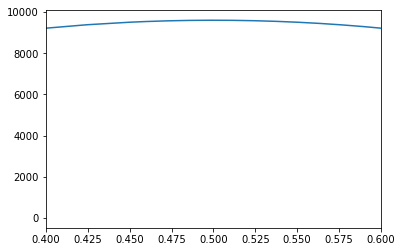

In [29]:
x = np.linspace(0,1,1000)
n = np.ceil( (100*1.95996)**2*x*(1-x) )
pylab.plot(x, n)
xlim(0.4, 0.6) 
pylab.show()